# Cleaning Data in Python

## Cleaning data
- Prepare data for analysis
- Data almost never comes in clean
- Diagnose your data for problems

### Common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data values

### Unclean data
- Column name inconsistencies
- Missing data
- Country names are in French

### Loading and viewing your data

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

In [2]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('sampledata.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

    ITEM_NO  AMC Item Number                         ITEM_DESC  Logic Count  \
0  44207509       L044207509   DRAWER, DELTA VARIO ATLAS 120MM         1335   
1  44207668       L044207668          TOILET PAPER, COTTENELLE          445   
2  44207958       L044207958          LINER, TRASH CAN, DOM SM          259   
3  44208068       L044208068                 BLANKET, YC (G&G)          371   
4  44207583       L044207583   FOAMING SOAP, SQUARE M+G 5.4 oz          523   

   Seafrigo Count  Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE  
0            2235                  900         $25,945.19            False  
1             985                  540         $17,813.36            False  
2             759                  500         $14,445.00            False  
3             811                  440         $94,467.70            False  
4             885                  362         $63,712.00            False  
       ITEM_NO  AMC Item Number                              IT

### Further diagnosis

The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column

In [3]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
ITEM_NO                1344 non-null object
 AMC Item Number       1344 non-null object
ITEM_DESC              1344 non-null object
Logic Count            1344 non-null int64
Seafrigo Count         1344 non-null int64
Discrepancy (cases)    1344 non-null int64
 Discrepancy Value     1344 non-null object
ACTIVE/INACTIVE        1312 non-null object
dtypes: int64(3), object(5)
memory usage: 84.1+ KB
None


## Exploratory data analysis

### Frequency counts
- Count the number of unique values in our data

### Summary statistics
- Numeric columns
- Outliers
 - Considerably higher or lower
 - Require further investigation
 
### Calculating summary statistics

use the .describe() method to calculate summary statistics of your data

In [4]:
df.describe()

,Logic Count,Seafrigo Count,Discrepancy (cases)
count,1344.000000,1344.000000,1344.000000
mean,102.223214,105.773065,3.549851
std,464.179197,469.909194,38.348567
min,0.000000,0.000000,-48.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,34.250000,36.250000,0.000000
max,9077.000000,9077.000000,900.000000


### Frequency counts for categorical data

.describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.

In [5]:
# Print the value counts for 'Borough'
print(df['Logic Count'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['Seafrigo Count'].value_counts(dropna=False))

0       895
5        10
2         9
1         8
6         6
17        5
9         5
39        5
7         4
8         4
4         4
37        4
3         4
30        4
19        4
53        4
54        4
24        4
61        3
151       3
51        3
52        3
140       3
72        3
62        3
286       3
125       3
46        3
76        3
82        3
       ... 
396       1
112       1
111       1
398       1
107       1
106       1
103       1
102       1
131       1
137       1
163       1
138       1
360       1
362       1
156       1
155       1
154       1
153       1
152       1
365       1
150       1
149       1
148       1
371       1
144       1
143       1
142       1
2089      1
139       1
4010      1
Name: Logic Count, Length: 270, dtype: int64
0       892
5        10
2         9
1         7
6         6
17        5
3         5
9         5
30        4
46        4
48        4
24        4
51        4
53        4
19        4
37        4
88        4
8         4
7      

## Visual exploratory data analysis

### Data visualization
- Great way to spot outliers and obvious errors
- More than just looking for pa!erns
- Plan data cleaning steps

### Visualizing single variables with histograms

The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

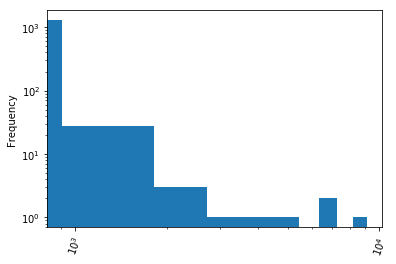

In [6]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Logic Count'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

### Visualizing multiple variables with boxplots

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

### Box plots
- Visualize basic summary statistics
 - Outliers
 - Min/max
 - 25th, 50th, 75th percentiles

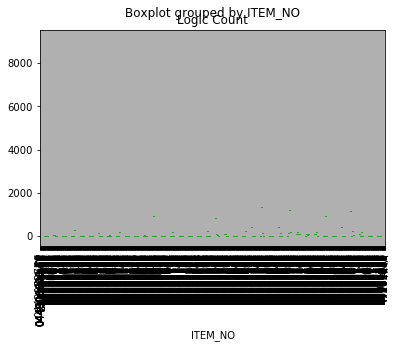

In [9]:
# Create the boxplot
df.boxplot(column='Logic Count', by='ITEM_NO', rot=90)

# Display the plot
plt.show()

### Bar plots and histograms
- Bar plots for discrete data counts
- Histograms for continuous data counts
- Look at frequencies

### Visualizing multiple variables with scatter plots

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

### Sca!er plots
- Relationship between 2 numeric variables
- Flag potentially bad data
 - Errors not found by looking at 1 variable

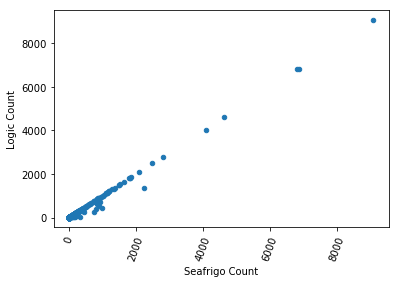

In [15]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='Seafrigo Count', y='Logic Count', rot=70)
plt.show()

In [11]:
df.columns

Index([u'ITEM_NO', u' AMC Item Number ', u'ITEM_DESC', u'Logic Count',
       u'Seafrigo Count', u'Discrepancy (cases)', u' Discrepancy Value ',
       u'ACTIVE/INACTIVE'],
      dtype='object')

## Tidy data

- “Tidy Data” paper by Hadley Wickham, PhD
- Formalize the way we describe the shape of data
- Gives us a goal when forma!ing our data
- “Standard way to organize data values within a dataset”

### Principles of tidy data
- Columns represent separate variables
- Rows represent individual observations
- Observational units form tables
- Be!er for reporting vs. be!er for analysis
- Tidy data makes it easier to fix common data problems

### Converting to tidy data
- The data problem we are trying to fix:
 - Columns containing values, instead of variables
- Solution: pd.melt()

### Recognizing tidy data

For data to be tidy, it must have:
- Each variable as a separate column.
- Each row as a separate observation.

As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

### Reshaping your data using melt

Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently.

In [16]:
df.head()

,ITEM_NO,AMC Item Number,ITEM_DESC,Logic Count,Seafrigo Count,Discrepancy (cases),Discrepancy Value,ACTIVE/INACTIVE
0,44207509,L044207509,"DRAWER, DELTA VARIO ATLAS 120MM",1335,2235,900,"$25,945.19",False
1,44207668,L044207668,"TOILET PAPER, COTTENELLE",445,985,540,"$17,813.36",False
2,44207958,L044207958,"LINER, TRASH CAN, DOM SM",259,759,500,"$14,445.00",False
3,44208068,L044208068,"BLANKET, YC (G&G)",371,811,440,"$94,467.70",False
4,44207583,L044207583,"FOAMING SOAP, SQUARE M+G 5.4 oz",523,885,362,"$63,712.00",False


In [18]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(df, id_vars=['Logic Count', 'Seafrigo Count'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Logic Count  Seafrigo Count variable     value
0         1335            2235  ITEM_NO  44207509
1          445             985  ITEM_NO  44207668
2          259             759  ITEM_NO  44207958
3          371             811  ITEM_NO  44208068
4          523             885  ITEM_NO  44207583


### Customizing melted data

When melting DataFrames, it would be better to have column names more meaningful than variable and value.

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter.

In [20]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(df, id_vars=['ITEM_NO', 'Seafrigo Count'], var_name='Logic Count', value_name='ITEM_DESC')

# Print the head of airquality_melt
print(airquality_melt.head())

    ITEM_NO  Seafrigo Count        Logic Count     ITEM_DESC
0  44207509            2235   AMC Item Number    L044207509 
1  44207668             985   AMC Item Number    L044207668 
2  44207958             759   AMC Item Number    L044207958 
3  44208068             811   AMC Item Number    L044208068 
4  44207583             885   AMC Item Number    L044207583 


## Pivoting data

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted).

### Pivot: un-melting data 
- Opposite of melting
- In melting, we turned columns into rows
- Pivoting: turn unique values into separate columns
- Analysis friendly shape to reporting friendly shape
- Violates tidy data principle: rows contain observations
 - Multiple variables stored in the same column
 
### Resetting the index of a DataFrame

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index()

### Pivoting duplicate values

.pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.

You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

NumPy and pandas have been imported as np and pd respectively.

## Beyond melt and pivot

### Beyond melt and pivot
- Melting and pivoting are basic tools
- Another common problem:
 - Columns contain multiple bits of information
 
### Splitting a column with .str

The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

### Splitting a column with .split() and .get()

Another common way multiple variables are stored in columns is with a delimiter

Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want

## Concatenating data

### Combining data
- Data may not always come in 1 huge file
 - 5 million row dataset may be broken into, 5 separate datasets
 - Easier to store and share
 - May have new data for each day
- Important to be able to combine then clean, or vice versa

### Combining rows of data

### Combining columns of data

Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same pd.concat() function, but this time with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.

## Finding and concatenating data

### Concatenating many files
- Leverage Python’s features with data cleaning in pandas
- In order to concatenate DataFrames:
 - They must be in a list
 - Can individually load if there are a few datasets
 - But what if there are thousands?
- Solution: glob function to find files based on a pattern

### Globbing
- Pa!ern matching for file names
- Wildcards: * ?
 - Any csv file: *.csv
 - Any single character: file_?.csv
- Returns a list of file names
- Can use this list to load into separate DataFrames

### The plan
- Load files from globbing into pandas
- Add the DataFrames into a list
- Concatenate multiple datasets at once

### Finding files that match a pattern

Similarly, you can find all .csv files with '*.csv', or all parts with 'part_*'. The ? wildcard represents any 1 character, and the * wildcard represents any number of characters.

In [23]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())


['sampledata.csv', 'sampledata2.csv', 'sampledata3.csv']
    ITEM_NO               ITEM_DESC  Logic Packs  Weber Packs  Discrepancies  \
0  44208068       BLANKET, YC (G&G)          461          960            499   
1  44207692  REST, CHOPSTICK, ASIAN           14          168            154   
2  44206900   BAG, NC HEADSET - RED            0          175            175   
3  44207411      TRAY 1/3 ATLAS, YC            0           84             84   
4  44207360            AIRSICK BAGS          258          385            127   

   Inventory Discrepancy Value  Issue ACTIVE/INACTIVE  
0                  $103,695.12    NaN           False  
1                   $34,358.02    NaN           False  
2                   $25,200.00    NaN           False  
3                    $9,220.88    NaN           False  
4                    $6,350.00    NaN           False  


### Iterating and concatenating all matches

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called frames. Your job is to use a for loop to iterate through each of the filenames, read each filename into a DataFrame, and then append it to the frames list.

You can then concatenate this list of DataFrames using pd.concat()

In [25]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

(4032, 14)
   AMC Item Number   Discrepancy Value   Inventory Discrepancy Value   \
0       L044207509          $25,945.19                            NaN   
1       L044207668          $17,813.36                            NaN   
2       L044207958          $14,445.00                            NaN   
3       L044208068          $94,467.70                            NaN   
4       L044207583          $63,712.00                            NaN   

  ACTIVE/INACTIVE  Americold Count  Discrepancies  Discrepancy (cases)  \
0           False              NaN            NaN                900.0   
1           False              NaN            NaN                540.0   
2           False              NaN            NaN                500.0   
3           False              NaN            NaN                440.0   
4           False              NaN            NaN                362.0   

                         ITEM_DESC   ITEM_NO Issue  Logic Count  Logic Packs  \
0  DRAWER, DELTA VARIO AT

## Merge data

- Similar to joining tables in SQL
- Combine disparate datasets based on common columns

### Types of merges

- One-to-one
- Many-to-one / one-to-many
- Many-to-many

### Different types of merges

- One-to-one
- Many-to-one
- Many-to-many
- All use the same function
- Only difference is the DataFrames you are merging

### 1-to-1 data merge

Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

### Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

### Many-to-many data merge

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

## Data types

- There may be times we want to convert from one type to another
 - Numeric columns can be strings, or vice versa
 
### Categorical data
- Converting categorical data to ‘category’ dtype:
 - Can make the DataFrame smaller in memory
 - Can make them be utilized by other Python libraries for analysis 

### Converting data types

### Working with numeric data

If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the pd.to_numeric() function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.

## Using regular expressions to clean strings

### String manipulation
- Much of data cleaning involves string manipulation 
 - Most of the world’s data is unstructured text
- Also have to do string manipulation to make datasets consistent with one another

### String manipulation
- Many built-in and external libraries 
- ‘re’ library for regular expressions
 - A formal way of specifying a pa ern
 - Sequence of characters Pa ern matching
- Similar to globbing   

### Using regular expressions
- Compile the pattern
- Use the compiled pattern to match values
- This lets us use the pattern over and over again
- Useful since we want to match values down a column of values

### String parsing with regular expressions

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

The regular expression module in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

In [2]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result = prog.match('1123-456-7890')
print(bool(result))

True
False


### Extracting numerical values from strings

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

In [3]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


### Pattern matching

write the appropriate pattern to match it.

In [4]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


## Using functions to clean data

### Complex cleaning
- Cleaning step requires multiple steps 
 - Extract number from string
 - Perform transformation on extracted number 
- Python function

### Custom functions to clean data

### Lambda functions

Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an .apply() method:

def my_square(x):
    return x ** 2

df.apply(my_square)

The equivalent code using a lambda function is:

df.apply(lambda x: x ** 2)

The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

## Duplicate and missing data

- Can skew results 
- ‘.drop_duplicates()’ method

### Fill missing values with .fillna()
- Fill with provided value 
- Use a summary statistic

### Fill missing values with a test statistic
- Careful when using test statistics to fill
- Have to make sure the value you are filling in makes sense 
- Median is a be er statistic in the presence of outliers

### Dropping duplicate data

Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

### Filling missing data

## Testing with asserts

### Assert statements
- Programmatically vs visually checking
- If we drop or fill NaNs, we expect 0 missing values 
- We can write an assert statement to verify this 
- We can detect early warnings and errors
- This gives us confidence that our code is running correctly

### Testing your data with asserts

use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull().

# Putting it all together

- Load and view data in pandas
- Visually inspect data for errors and potential problems
- Tidy data for analysis and reshape it
- Combine datasets
- Clean data by using regular expressions and functions
- Test your data and be proactive in finding potential errors

### Combining data
- pd.merge(df1, df2, ...) 
- pd.concat([df1, df2, df3, ...])

## Initial impressions of the data

### Principles of tidy data
- Rows form observations
- Columns form variables
- Tidying data will make data cleaning easier 
- Melting turns columns into rows
- Pivot will take unique values from a column and create new columns

### Exploratory analysis

Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called g1800s. In the IPython Shell, use pandas methods such as .head(), .info(), and .describe(), and DataFrame attributes like .columns and .shape to explore it.

### Visualizing your data

### Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

### Assembling your data

### Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

### Checking the data types

### Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

The set of lower and upper case letters.
Whitespace between words.
Periods for any abbreviations.
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Python has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names

### More data cleaning and processing

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

### Wrapping up

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation

To investigate how average life expectancy changed over the years. You need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the .groupby() method.

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.